In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0, 23, 23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

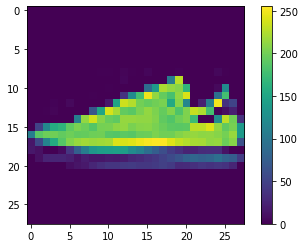

In [8]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# data preprocessing
train_images = train_images / 255.0
test_images = test_images / 255.0
# squished values to be in between 0 and 1

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4942 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3773 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3376 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3128 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2944 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2816 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2686 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2573 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2466 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 0s 781us/step - loss: 0.3392 - accuracy: 0.8811
Test accuracy:  0.8810999989509583


In [17]:
predictions = model.predict(test_images)

In [15]:
test_images.shape

(10000, 28, 28)

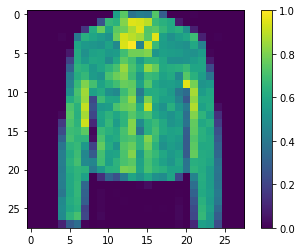

'Coat'

In [24]:
pred = 10
plt.figure()
plt.imshow(test_images[pred])
plt.colorbar()
plt.show()

class_names[np.argmax(predictions[pred])]

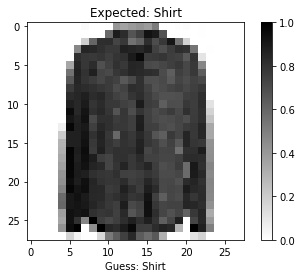

In [34]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Pick a number: ")
        if(num.isdigit()):
            num = int(num)
            if 0 <= num <= test_images.shape[0]:
                return int(num)
            else:
                print("Try again...")
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)